In [1]:
# Import required libraries
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [128]:
# Load data
data = pd.read_csv('ETH_USDT__data_1h.csv')
data.dropna(inplace=True)
# data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y').dt.date
data['date'] = pd.to_datetime(data['open_time'], unit='ms')
data.drop_duplicates(subset='date', keep='first', inplace=True)
df = data[['date', 'close', 'high', 'low']]
df = df.iloc[24 * 60:24 * 180, :]
df.set_index('date', inplace=True)
df.head()

,close,high,low
date,,,
2021-05-31 23:00:00,2706.15,2720.00,2639.20
2021-06-01 00:00:00,2730.67,2740.00,2690.00
2021-06-01 01:00:00,2662.06,2730.67,2656.73
2021-06-01 02:00:00,2644.88,2675.92,2612.63
2021-06-01 03:00:00,2630.79,2679.88,2613.00


In [131]:
# Add diff with period 1
df['diff'] = df['close'].pct_change(1)*100

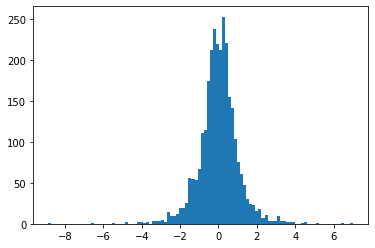

In [132]:
# Check for local normalized distribution
plt.hist(df['diff'].values, bins=100)
plt.show()

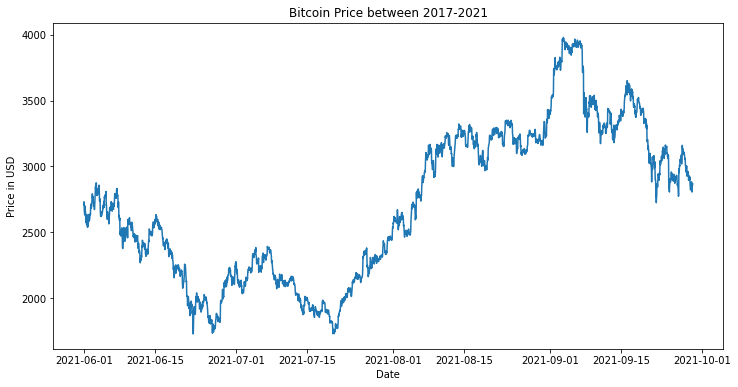

In [55]:
# Plot data
plt.figure(figsize=(12, 6))
plt.plot(df.index.values, df['close'])
plt.title('Bitcoin Price between 2017-2021')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.show()

In [71]:
from ta.momentum import RSIIndicator, AwesomeOscillatorIndicator
from ta.trend import MACD, ADXIndicator
from ta.volatility import BollingerBands


def add_technical_indicators():
    """
    Add MACD, ADX, RSI, AO, BB to the dataframe
    :return:
    """
    # Create MACD using ta library
    df['macd'] = MACD(close=df['close'], window_slow=26, window_fast=12, window_sign=9).macd()

    # Create ADX using ta library
    df['adx'] = ADXIndicator(high=df['high'], low=df['low'], close=df['close'], window=14).adx()

    # Create upper and lower bollinger bands using ta library
    indicator_bb = BollingerBands(close=df['close'], window=20, window_dev=2)
    # df['upper_bb'] = indicator_bb.bollinger_hband()
    # df['lower_bb'] = indicator_bb.bollinger_lband()
    df['bb_perc'] = indicator_bb.bollinger_pband()  # Percentage band
    df['bb_width'] = indicator_bb.bollinger_wband()  # Width band

    # Create RSI using ta library
    df['rsi'] = RSIIndicator(close=df['close'], window=14).rsi()

    # Create Awesome Osciallator using ta library
    df['ao'] = AwesomeOscillatorIndicator(high=df['high'], low=df['low'], window1=5, window2=34).awesome_oscillator()

In [72]:
# Add technical indicators using the above function
add_technical_indicators()

c:\users\nikhi\pycharmprojects\crypto-trading-bot\venv\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
c:\users\nikhi\pycharmprojects\crypto-trading-bot\venv\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [73]:
# Drop nan values
df = df.dropna()
df.drop(labels=['high', 'low'], inplace=True, axis=1)
df.head()

,close,macd,adx,bb_perc,bb_width,rsi,ao
date,,,,,,,
2021-06-02 08:00:00,2713.71,9.712638,14.093483,1.120491,6.749468,63.592360,35.689706
2021-06-02 09:00:00,2684.51,12.792946,15.141808,0.912257,7.197615,58.232595,48.525647
2021-06-02 10:00:00,2681.16,14.793268,15.895290,0.851686,7.568330,57.632453,61.315029
2021-06-02 11:00:00,2694.35,17.244082,16.231895,0.871008,7.867020,59.406360,69.355059
2021-06-02 12:00:00,2701.10,19.506183,16.820909,0.867012,7.781784,60.321931,74.250294


In [108]:
df = df.dropna()
df.head()

,macd,adx,bb_perc,bb_width,rsi,ao,diff
date,,,,,,,
2021-06-02 09:00:00,0.639487,0.131306,0.746722,0.291050,0.628978,0.700746,-29.20
2021-06-02 10:00:00,0.648146,0.143485,0.714360,0.308277,0.620565,0.721110,-3.35
2021-06-02 11:00:00,0.658755,0.148926,0.724683,0.322158,0.645432,0.733912,13.19
2021-06-02 12:00:00,0.668548,0.158447,0.722548,0.318197,0.658267,0.741707,6.75
2021-06-02 13:00:00,0.686136,0.178872,0.770566,0.333709,0.714895,0.744400,31.50


In [107]:
df.drop(labels=['close'], inplace=True, axis=1)
df.head()

,macd,adx,bb_perc,bb_width,rsi,ao,diff
date,,,,,,,
2021-06-02 08:00:00,0.626152,0.114361,0.857979,0.270224,0.704112,0.680308,NaN
2021-06-02 09:00:00,0.639487,0.131306,0.746722,0.291050,0.628978,0.700746,-29.20
2021-06-02 10:00:00,0.648146,0.143485,0.714360,0.308277,0.620565,0.721110,-3.35
2021-06-02 11:00:00,0.658755,0.148926,0.724683,0.322158,0.645432,0.733912,13.19
2021-06-02 12:00:00,0.668548,0.158447,0.722548,0.318197,0.658267,0.741707,6.75


In [115]:
# We will use past 'p' time steps to predict the future 'q' time steps
p = 4
q = 1
num_epochs = 100  # These settings are used while training the model
mini_batch_size = 32
dropout = 0.2

# Convert dataframe to numpy array
price_array = df.to_numpy()

In [116]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Preprocess data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
# scaler = StandardScaler()
price_array = scaler.fit_transform(price_array)
price_array

array([[0.63948664, 0.1313058 , 0.74672206, ..., 0.62897826, 0.70074626,
        0.57341753],
       [0.64814594, 0.14348505, 0.71435974, ..., 0.62056535, 0.72111025,
        0.62258445],
       [0.65875539, 0.14892592, 0.72468338, ..., 0.64543229, 0.73391204,
        0.65404367],
       ...,
       [0.42560448, 0.30216018, 0.42774524, ..., 0.39738778, 0.50903358,
        0.70486534],
       [0.43637949, 0.29897579, 0.45986654, ..., 0.41544333, 0.51447114,
        0.64147139],
       [0.45209237, 0.29021593, 0.52917143, ..., 0.45961522, 0.51983011,
        0.65973068]])

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def make_train_test_data(p_arr, test_size=0.2, shuffle=True):
    """
    This function creates training and testing data from the input array using p and q values provided above.
    :param p_arr:
    :param test_size:
    :param shuffle:
    :return:
    """
    # Make sequences of 100 previous values and take the next value as the target
    time_offset = p + q
    step = 1
    d = []
    for index in range(0, len(p_arr) - time_offset, step):
        d.append(p_arr[index: index + time_offset, :])
    d = np.array(d)

    x_data = d[:, :-q, :-1]
    y_data = d[:, -q:, -1]
    y_data = y_data.reshape((y_data.shape[0], q, 1))

    # Split data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=test_size, shuffle=shuffle,
                                                        random_state=42)

    return X_train, Y_train, X_test, Y_test

In [118]:
# Split data into training and test sets using the above function
x_train, y_train, x_test, y_test = make_train_test_data(price_array, test_size=0.2, shuffle=False)
print('Shapes of x_train, x_test, y_train, y_test:', x_train.shape, x_test.shape, y_train.shape, y_test.shape)

Shapes of x_train, x_test, y_train, y_test: (2272, 4, 6) (569, 4, 6) (2272, 1, 1) (569, 1, 1)


In [119]:
from keras.layers import Bidirectional, Activation
from dain import Dain

# Create LSTM model
model = Sequential()
# model.add(Dain(dim=x_train.shape[1], n_features=x_train.shape[2]))
model.add(
    Bidirectional(LSTM(units=p, return_sequences=True)))
model.add(Dropout(dropout))
model.add(Bidirectional(LSTM(units=p * 2, return_sequences=True)))
model.add(Dropout(dropout))
model.add(Bidirectional(LSTM(units=p, return_sequences=False)))
model.add(Dense(units=q))
model.add(Activation('linear'))

# Build model with the input shape
model.build(input_shape=(None, x_train.shape[1], x_train.shape[2]))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()  # Print model summary

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_27 (Bidirecti  (None, 4, 8)             352       
 onal)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 4, 8)              0         
                                                                 
 bidirectional_28 (Bidirecti  (None, 4, 16)            1088      
 onal)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 4, 16)             0         
                                                                 
 bidirectional_29 (Bidirecti  (None, 8)                672       
 onal)                                                           
                                                      

In [120]:
# Train model
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=mini_batch_size, validation_split=0.1)

Epoch 1/100
64/64 [==============================] - 8s 35ms/step - loss: 0.0886 - val_loss: 0.0056
Epoch 2/100
64/64 [==============================] - 1s 13ms/step - loss: 0.0099 - val_loss: 0.0047
Epoch 3/100
64/64 [==============================] - 1s 14ms/step - loss: 0.0077 - val_loss: 0.0038
Epoch 4/100
64/64 [==============================] - 1s 14ms/step - loss: 0.0065 - val_loss: 0.0034
Epoch 5/100
64/64 [==============================] - 1s 14ms/step - loss: 0.0052 - val_loss: 0.0031
Epoch 6/100
64/64 [==============================] - 1s 14ms/step - loss: 0.0045 - val_loss: 0.0028
Epoch 7/100
64/64 [==============================] - 1s 14ms/step - loss: 0.0039 - val_loss: 0.0027
Epoch 8/100
64/64 [==============================] - 1s 14ms/step - loss: 0.0035 - val_loss: 0.0027
Epoch 9/100
64/64 [==============================] - 1s 14ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 10/100
64/64 [==============================] - 1s 14ms/step - loss: 0.0029 - val_loss: 0.0026

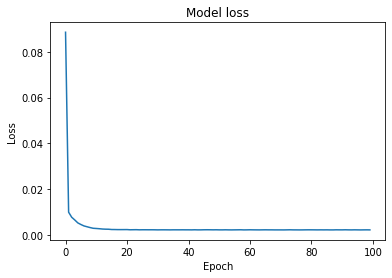

In [121]:
# Plot training loss vs number of epochs
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [125]:
x_test_n = x_test[:, :, :]
y_test_n = y_test[:, :, :]

In [126]:
import math

# Print the predicted and actual values
predicted = model.predict(x_test_n)

count = 0
balance = 500
stake = 100

total_profit = 0
trades = []
balance_history = []
diffs = []
for i in range(len(predicted)):
    cur_price = x_test_n[i, -1, 0]
    if cur_price == 0:
        continue
    p_diff = predicted[i][0] - cur_price
    a_diff = y_test_n[i][0][0] - cur_price
    diffs.append(abs(p_diff) * 100 / cur_price)
    sign = np.sign(p_diff * a_diff)
    if balance >= stake and 1 <= (abs(p_diff) * 100 / cur_price) <= 5:
        balance -= stake
        profit = stake * a_diff / cur_price
        if p_diff < 0:
            profit = -profit
        total_profit += profit
        balance += profit + stake
        stake = 0.2 * balance
        trades.append([cur_price, predicted[i][0], y_test_n[i][0][0], profit, abs(p_diff) * 100 / cur_price])
        balance_history.append(balance)

    if a_diff * p_diff > 0:
        count += 1

print('Accuracy:', count / len(predicted))
print('Balance:', balance)
print('Profit:', total_profit)
trades = np.array(trades)
trades

Accuracy: 0.8910369068541301
Balance: 587.7547477571013
Profit: 87.75474775710079


array([[  0.61104878,   0.6408453 ,   0.62536138,   2.34230149,
          4.87629186],
       [  0.61767984,   0.64062554,   0.60868077,  -1.46374126,
          3.7148196 ],
       [  0.61881131,   0.64044231,   0.6077678 ,  -1.7877687 ,
          3.49557261],
       [  0.61545533,   0.64034128,   0.64419127,   4.66056338,
          4.04350313],
       [  0.61523483,   0.64032561,   0.65001141,   5.69497995,
          4.07824366],
       [  0.61853014,   0.6403327 ,   0.61870435,   0.02869825,
          3.52489906],
       [  0.61885831,   0.64030534,   0.64246044,   3.88608961,
          3.46557982],
       [  0.62117124,   0.64030588,   0.70187918,  13.34006469,
          3.08041301],
       [  0.63365358,   0.64013451,   0.6124087 ,  -3.53180389,
          1.02278833],
       [  0.62507197,   0.64020318,   0.603222  ,  -3.65757373,
          2.42071451],
       [  0.61320934,   0.64026672,   0.66130934,   8.15007805,
          4.41242095],
       [  0.61342455,   0.64066404,   0.657

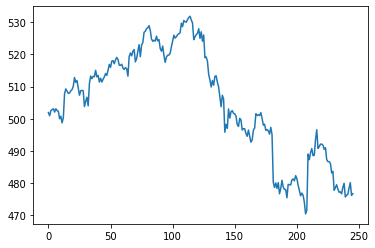

In [20]:
import matplotlib.pyplot as plt

# Plot the balance history
plt.plot(balance_history)
plt.show()

In [21]:
trades[trades[:, 3] < 0]

array([[  0.70210904,   0.71389544,   0.69510261,  -1.00180543,
          1.67871402],
       [  0.71020397,   0.72482139,   0.70304649,  -1.0140915 ,
          2.05819968],
       [  0.71026173,   0.718988  ,   0.70597879,  -0.60678882,
          1.22859935],
       [  0.70597879,   0.71464276,   0.70482808,  -0.16381851,
          1.22722858],
       [  0.69416072,   0.68513727,   0.71039502,  -2.34975066,
          1.29990718],
       [  0.71091483,   0.72293043,   0.69624887,  -2.06630789,
          1.69015984],
       [  0.7491503 ,   0.73591989,   0.75427739,  -0.69711603,
          1.7660549 ],
       [  0.75427739,   0.73775095,   0.75949778,  -0.70401212,
          2.19102944],
       [  0.73370239,   0.72632056,   0.74445861,  -1.50363235,
          1.00610606],
       [  0.71082598,   0.72660226,   0.69423625,  -2.3894524 ,
          2.21942925],
       [  0.69423625,   0.72128958,   0.67936591,  -2.18274937,
          3.8968477 ],
       [  0.68932686,   0.70668799,   0.688

In [116]:
def inverse_transform(y):
    """
    This function is used to inverse transform the predicted values to the original scale.
    :param y:
    :return:
    """
    y_scaler = MinMaxScaler(feature_range=(0, 1))
    y_scaler.min_, y_scaler.scale_ = scaler.min_[0], scaler.scale_[0]
    y = y.reshape(-1, 1)
    y = y_scaler.inverse_transform(y)
    return y

In [117]:
# Split data into training and test sets without shuffling
x_train, y_train, x_test, y_test = make_train_test_data(price_array, test_size=0.2, shuffle=False)

# Concatenate training and test actual y values
y_true = np.concatenate((y_train.flatten(), y_test.flatten()), axis=0)

# Get training and test predictions
train_pred = model.predict(x_train).flatten()
test_pred = model.predict(x_test).flatten()

# append np.nan to train_pred and test_pred to make them the same length as y_true
train_pred = np.append(train_pred, np.full(len(y_true) - len(train_pred), np.nan))
test_pred = np.append(np.full(len(y_true) - len(test_pred), np.nan), test_pred)

# Inverse transform predictions and y_true
train_pred = inverse_transform(train_pred)
test_pred = inverse_transform(test_pred)
y_true = inverse_transform(y_true)

# Create a dataframe with the predictions and actual values with date index
df_final = pd.DataFrame(
    {'Actual': y_true.flatten(), 'Training Predicted': train_pred.flatten(), 'Test Predicted': test_pred.flatten()})

df_final.head()

,Actual,Training Predicted,Test Predicted
0,2107.00,2115.588583,NaN
1,2097.20,2115.362020,NaN
2,2096.44,2107.746640,NaN
3,2104.24,2102.487998,NaN
4,2116.53,2107.919844,NaN


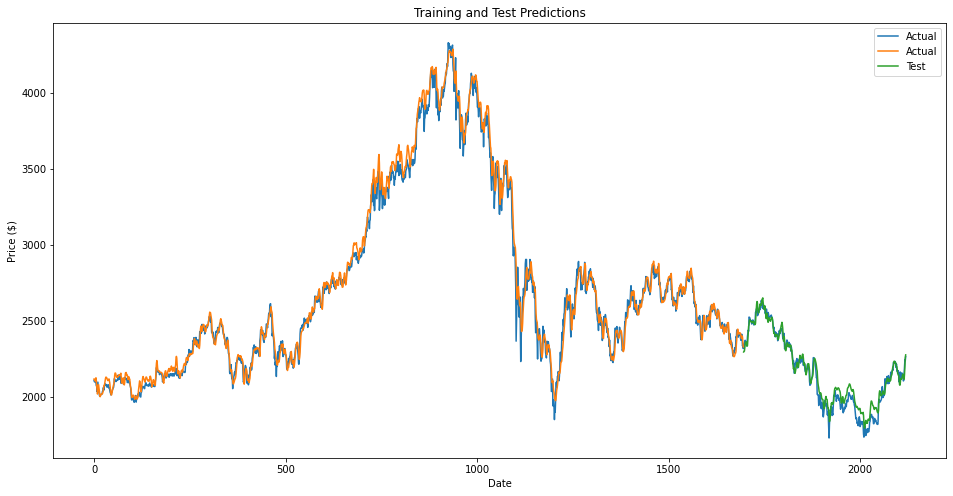

In [118]:
# Plot training and test predictions along with y_true
plt.figure(figsize=(16, 8))
plt.title('Training and Test Predictions')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.plot(df_final.index.values, df_final['Actual'], label='Actual')
plt.plot(df_final.index.values, df_final['Training Predicted'], label='Actual')
plt.plot(df_final.index.values, df_final['Test Predicted'], label='Test')
plt.legend()
plt.show()

In [31]:
from keras.models import load_model

# Load model and scaler
model = load_model('ETH_USDT__model_1hr.h5')

In [122]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(x_train).flatten()
print('Train R2:', r2_score(y_train.flatten(), y_pred))

y_pred = model.predict(x_test).flatten()
print('Test R2:', r2_score(y_test.flatten(), y_pred))

Train R2: -0.05186841256705077
Test R2: -0.05507053074511159


In [123]:
y_pred = model.predict(x_test)
y_test_1 = y_test.squeeze()
mape = (np.abs((y_test_1 - y_pred) * 2 / (y_test_1 + y_pred))) * 100
print('Test MAPE:', np.mean(mape))

Test MAPE: 8.000721357314752


In [124]:
y_pred = model.predict(x_train)
y_test_1 = y_train.squeeze()
mape = (np.abs((y_test_1 - y_pred) * 2 / (y_test_1 + y_pred))) * 100
print('Test MAPE:', np.mean(mape))

Test MAPE: 5.5860694996245535


In [20]:
# Split data into training and test sets without shuffling
# x_train, y_train, x_test, y_test = make_train_test_data(price_array, test_size=0.2, shuffle=False)
y_pred = model.predict(x_test)

mape = np.mean(np.abs((y_test.flatten() - y_pred.flatten()) * 2 / (y_test.flatten() + y_pred.flatten()))) * 100
print('mean absolute of percentage error:', mape)

mean absolute of percentage error: 33.958854251100895


In [40]:
# Divide the test data into 24 hour chunks
x_test_24 = []
y_test_24 = []
for i in range(0, len(x_test), 24):
    x_test_24.append(x_test[i, :, :])
    y_test_24.append(y_test[i, :, :])
x_test_24 = np.array(x_test_24)
y_test_24 = np.array(y_test_24)

print('x_test_24 shape:', x_test_24.shape)
print('y_test_24 shape:', y_test_24.shape)

x_test_24 shape: (73, 48, 7)
y_test_24 shape: (73, 24, 1)


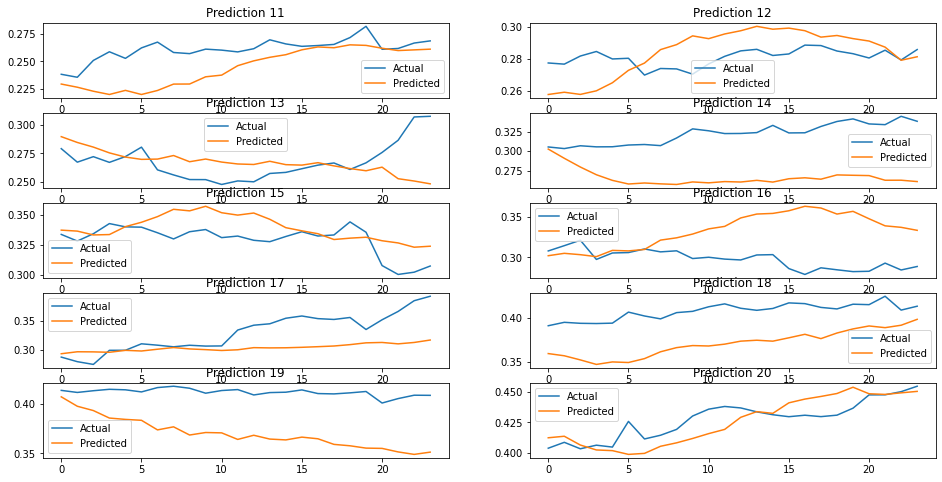

In [47]:
# Get predictions for the 24 hour chunks
y_pred_24 = model.predict(x_test_24)

# Plot the first 10 predictions for the 24 hour chunks in subplots
plt.figure(figsize=(16, 8))
for i in range(10, 20):
    plt.subplot(5, 2, i + 1 - 10)
    plt.title('Prediction {}'.format(i + 1))
    plt.plot(y_test_24[i, :, 0], label='Actual')
    plt.plot(y_pred_24[i, :], label='Predicted')
    plt.legend()
plt.show()

Average difference between first and last value of y_line: 0.446509692472728


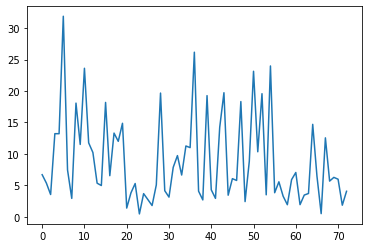

In [64]:
# Try fitting a line to one of the 24 hour chunks and get its slope
a = np.arange(1, 25)
diffs = []
for i in range(len(y_pred_24)):
    b = y_pred_24[i, :]

    theta = np.polyfit(a, b, 1)
    # print('theta:', theta)

    y_line = theta[1] + theta[0] * a

    # Print the difference b/w the first and the last value of y_line
    diff = (y_line[-1] - y_line[0]) * 100 / y_line[0]
    diffs.append(abs(diff))
    # print('Difference between first and last value of y_line:', diff)

print('Average difference between first and last value of y_line:', np.min(diffs))

plt.plot(diffs)
plt.show()
# Plotting the data points and the best fit line
# plt.scatter(a, b)
# plt.scatter(a, y_test_24[16, :, 0])
# plt.plot(a, y_line, 'r')
# plt.title('Best fit line using numpy.polyfit()')
# plt.xlabel('x-axis')
# plt.ylabel('y-axis')
#
# plt.show()

In [21]:
import pickle

# Save the model to disk
model.save('eth_model.h5')
# Save the scaler to disk
pickle.dump(scaler, open('eth_scaler.pkl', 'wb'))